## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. 
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


### 1.

We chose a few variables of interest. They're explained in section 2, but check out the ./data folder for the data we picked!

### 2.

The GSS dataset is a national survey seemingly similar to that of the US census that tracks demographic information and prompts specific questions regarding alcoholism, politics, work, etc. We chose the following variables from the GSS dataset: ballot, hrs1, wrkslf, weekswrk, joblose, jobfind, satjob, richwork, jobinc, jobsec, jobhour, jobpromo, jobmeans, id_, year. The overarching theme and idea of why we chose this data is that we wanted to look into information about jobs and working class individuals. Namely, we wanted information like working hours, perception of jobs (i.e. satisfaction, perception about loss, perception about capability to hop, continuing work if rich). Likewise, we also wanted to look at important job factors to people like income, job security, short hours, promotion capabilities, and work importance to understand how workers felt about their jobs. This data in particular could help us understand and gain insight on perceptions about jobs and people's thoughts regarding that. We initially hoped to analyze this information spanning multiple years, but realized that due to the nature of this information, a lot of the years contained null/missing data. Thus, we decided to hone in on the year 1985, as it contained the most information for these jobs. The year 1985 should still give us some interesting information to work since it followed a deep recession in the American economy - thus, we have some expectations for what we'll see in this data (namely with respect to the joblose and satjob variables). This insight on common workers perception as the economy was struggling to rebound from this recession will be the center of our analysis.

We were primarily interested in viewing some trends and relationships between these job factors. We compiled a few research questions that we thought could definitely be interesting based on these variables that we wanted to hopefully explore with our EDA, such as:
- Is there a correlation between being self employed and the number of hours worked? Are they typically happier with their jobs?
- What are the most important factors to people that identified they would continue working if rich? What about those that said they wouldn't continue working?
- How does perception about job loss and job finding capabilities interact with satisfaction?

### 3.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

df_gss = pd.read_csv("./data/GSS.csv")
df_gss.head()

,year,id_,hrs1,wrkslf,weekswrk,joblose,jobfind,satjob,richwork,jobinc,jobsec,jobhour,jobpromo,jobmeans,ballot
0,1972,1,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,A little dissatisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Moderately satisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Very satisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


Opening the data, we can see *many* observations with inapplicable responses and values. This is due to the spread of data available among the variables we chose from GSS. Some variables were only collected during the 90s, others during the 70s or 80s, some up until today. To maximize the consistency of our data, we must pinpoint year that minimizes these discrepancies and NaN values.  

In [2]:
df_gss.head()

,year,id_,hrs1,wrkslf,weekswrk,joblose,jobfind,satjob,richwork,jobinc,jobsec,jobhour,jobpromo,jobmeans,ballot
0,1972,1,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,A little dissatisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Moderately satisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,Very satisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,.i: Inapplicable,Someone else,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [3]:
df_gss.isnull().sum()

year        0
id_         0
hrs1        0
wrkslf      0
weekswrk    0
joblose     0
jobfind     0
satjob      0
richwork    0
jobinc      0
jobsec      0
jobhour     0
jobpromo    0
jobmeans    0
ballot      0
dtype: int64

While we don't have null values, the GSS codebook has specific values that might as well be null or non-applicable. Below is just one example of the variety of these codes:

In [4]:
df_gss["weekswrk"].unique()

array(['.i:  Inapplicable', 'None or zero', '52', '44', '30', '40', '45',
       '.d:  Do not Know/Cannot Choose', '28', '21', '38', '24', '26',
       '25', '20', '12', '32', '42', '16', '48', '51', '50', '6', '43',
       '.n:  No answer', '22', '36', '4', '46', '15', '49', '2', '11',
       '35', '39', '31', '9', '8', '41', '47', '3', '10', '7', '34', '1',
       '5', '33', '14', '17', '27', '18', '37', '23', '13', '29', '19',
       '.s:  Skipped on Web', '.x:  Not available in this release'],
      dtype=object)

To resolve this, we must go through each of our 12 variables and ensure these codes are uniformly represented in our data. First, we must rely on the codebook to identify all the different types of codes:

In [5]:
codes = [
    ".i:  Inapplicable",
    ".m:  DK, NA, IAP",
    ".p:  Not applicable (I have not faced this decision)/Not imputable",
    ".j:  I do not have a job",
    ".y:  Not available in this year",
    ".x:  Not available in this release",
    ".r:  Refused",
    ".f:  Missing Birthdate Information",
    ".q:  Not imputable",
    ".u:  Uncodable",
    ".z:  Variable-specific reserve code",
    ".s:  Skipped on Web",
    ".d:  Do not Know/Cannot Choose",
    ".n:  No answer"
]

Now we know what to look for when replacing values for NaN. Year, id_, and ballot all look fine, so we can move on to cleaning more important variables. 

In [6]:
print(df_gss["year"].unique())
print(df_gss["id_"].unique())
print(df_gss["ballot"].unique())

[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022 2024]
[   1    2    3 ... 4508 4509 4510]
['.i:  Inapplicable' 'Ballot b' 'Ballot c' 'Ballot a' 'Ballot d']


Now replace any values with the codes with NaN. This ensures these values do not appear in our visualizations, as we care less about the context of the missing data and more that it is not there to begin with.

In [7]:
df_gss = df_gss.replace(codes, np.nan)
df_gss["hrs1"].unique()

array([nan, '27', '40', '52', '35', '45', '70', '60', '42', '23', '55',
       '50', '6', '37', '36', '48', '16', '24', '20', '80', '65', '15',
       '39', '25', '22', '44', '26', '38', '12', '41', '84', '18', '54',
       '32', '3', '29', '51', '30', '89+ hrs', '43', '58', '28', '46',
       '8', '9', '19', '14', '66', '61', '49', '10', '72', '34', '75',
       '53', '7', '21', '47', '57', '71', '13', '5', '31', '17', '56',
       '4', '0', '33', '1', '68', '11', '2', '85', '62', '59', '78', '77',
       '64', '63', '67', '73', '88', '69', '76', '74', '81', '79', '86',
       '87', '83', '82'], dtype=object)

Our values look better, but we still need to handle the "89+ hrs", as well as convert these values to integers.

In [8]:
df_gss["hrs1"] = df_gss["hrs1"].astype(str)
df_gss["hrs1"] = df_gss["hrs1"].str.replace("89+ hrs", "89")
df_gss["hrs1"] = pd.to_numeric(df_gss["hrs1"], errors="coerce")
df_gss["hrs1"].unique()

array([nan, 27., 40., 52., 35., 45., 70., 60., 42., 23., 55., 50.,  6.,
       37., 36., 48., 16., 24., 20., 80., 65., 15., 39., 25., 22., 44.,
       26., 38., 12., 41., 84., 18., 54., 32.,  3., 29., 51., 30., 89.,
       43., 58., 28., 46.,  8.,  9., 19., 14., 66., 61., 49., 10., 72.,
       34., 75., 53.,  7., 21., 47., 57., 71., 13.,  5., 31., 17., 56.,
        4.,  0., 33.,  1., 68., 11.,  2., 85., 62., 59., 78., 77., 64.,
       63., 67., 73., 88., 69., 76., 74., 81., 79., 86., 87., 83., 82.])

Looks good! Let's keep going with other variables.

In [9]:
# looks good already
print(df_gss["wrkslf"].unique())

df_gss["weekswrk"] = df_gss["weekswrk"].astype(str)
df_gss["weekswrk"] = df_gss["weekswrk"].replace("None or zero", np.nan)
df_gss["weekswrk"] = pd.to_numeric(df_gss["weekswrk"], errors="coerce")
df_gss["weekswrk"].unique()

['Someone else' nan 'Self-employed']


array([nan, 52., 44., 30., 40., 45., 28., 21., 38., 24., 26., 25., 20.,
       12., 32., 42., 16., 48., 51., 50.,  6., 43., 22., 36.,  4., 46.,
       15., 49.,  2., 11., 35., 39., 31.,  9.,  8., 41., 47.,  3., 10.,
        7., 34.,  1.,  5., 33., 14., 17., 27., 18., 37., 23., 13., 29.,
       19.])

"None or zero" weeks worked in a year is equivalent to being unemployed, which falls under the code ".j:  I do not have a job", meaning we can remove it as well.

In [10]:
# all look good!
print(df_gss["joblose"].unique())
print(df_gss["jobfind"].unique())
print(df_gss["satjob"].unique())
print(df_gss["richwork"].unique())

[nan 'Not likely' 'Not too likely' 'Very likely' 'Fairly likely'
 'Leaving labor force']
[nan 'Not easy' 'Very easy' 'Somewhat easy']
['A little dissatisfied' nan 'Moderately satisfied' 'Very satisfied'
 'Very dissatisfied']
[nan 'Stop working' 'Continue to work']


Since these variables only contain their expected answers, our last five variables correspond to different job factors and how important each one is to an individual. 

In [11]:
rank_variables = ["jobinc", "jobsec", "jobhour", "jobpromo", "jobmeans"]

for var in rank_variables:
    print(df_gss[var].unique())

[nan 'FOURTH' 'SECOND' 'THIRD' 'MOST IMPT' 'FIFTH']
[nan 'MOST IMPT' 'FOURTH' 'FIFTH' 'THIRD' 'SECOND']
[nan 'FIFTH' 'THIRD' 'SECOND' 'FOURTH' 'MOST IMPT']
[nan 'SECOND' 'MOST IMPT' 'FOURTH' 'THIRD' 'FIFTH']
[nan 'THIRD' 'SECOND' 'FIFTH' 'MOST IMPT' 'FOURTH']


We can standardize this data by mapping each importance level to their corresponding integer.

In [12]:
ranking = {
    "MOST IMPT": 1,
    "SECOND": 2,
    "THIRD": 3,
    "FOURTH": 4,
    "FIFTH": 5
}

df_gss["jobinc"] = df_gss["jobinc"].map(ranking)
df_gss["jobsec"] = df_gss["jobsec"].map(ranking)
df_gss["jobhour"] = df_gss["jobhour"].map(ranking)
df_gss["jobpromo"] = df_gss["jobpromo"].map(ranking)
df_gss["jobmeans"] = df_gss["jobmeans"].map(ranking)


for var in rank_variables:
    print(df_gss[var].unique())

[nan  4.  2.  3.  1.  5.]
[nan  1.  4.  5.  3.  2.]
[nan  5.  3.  2.  4.  1.]
[nan  2.  1.  4.  3.  5.]
[nan  3.  2.  5.  1.  4.]


Now we can check out NaN counts for each variable:

In [13]:
df_gss.isna().sum()

year            0
id_             0
hrs1        32371
wrkslf       7350
weekswrk    46454
joblose     49722
jobfind     49839
satjob      21568
richwork    46041
jobinc      53893
jobsec      53894
jobhour     53898
jobpromo    53896
jobmeans    53885
ballot      21875
dtype: int64

Five variables have over 50,000 missing values! This is largely due to difference in overlap of years in which the variable data were collected. We can confirm this as follows:

[Text(0.5, 1.0, 'Count of jobmeans by Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count')]

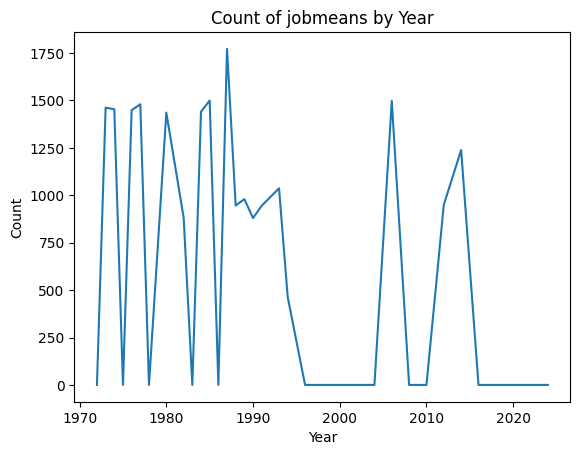

In [14]:
jobmeans_by_year = df_gss.groupby("year")["jobmeans"].count().reset_index()

fig = sns.lineplot(data=jobmeans_by_year, x="year", y="jobmeans")
fig.set(title="Count of jobmeans by Year",
xlabel="Year",
ylabel="Count")

Data was sparsely collected during the 70s and 80s, becoming more consistent during the early 90s. Yet, it remained dry up until 2006 and was only collected again in 2012 and 2014. The challenge here is deciding how to handle these missing values. While we are missing lots of data, we cannot drop entire columns due to the value the remaining values pose for our exploratory analysis. At the same time, we cannot impute these values because they correspond to specific years. Replacing missing values across years would be too strong of a generalization and contaminate any genuine patterns in our data. Thus, we can limit the scope of our data honing in on a specific year that minimizes our NaN values across all variables:

In [15]:
nans_by_year = df_gss.isna().groupby(df_gss["year"]).sum().sum(axis=1)
observations_by_year = df_gss.groupby("year").size()

nan_summary = pd.DataFrame({
    "Observations": observations_by_year,
    "NaNs Across All Variables": nans_by_year
})

nan_summary["NaN Ratio"] = nan_summary["NaNs Across All Variables"] / nan_summary["Observations"]
nan_summary_sorted = nan_summary.sort_values(by="NaN Ratio")
nan_summary_sorted

,Observations,NaNs Across All Variables,NaN Ratio
year,,,
1985,1534,6008,3.916558
1977,1530,6202,4.053595
1984,1473,7531,5.112695
1987,1819,9324,5.125893
1990,1372,7106,5.179300
1980,1468,7617,5.188692
1993,1606,8353,5.201121
1988,1481,7778,5.251857
1989,1537,8162,5.310345


Sorting by the ratio of NaN values to actual observations, we can see 1985 is the best year that minimizes these gaps. We will use this specific year moving forward. 

In [16]:
filtered_df_gss = df_gss[df_gss["year"] == 1985]

In [17]:
filtered_df_gss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 17052 to 18585
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1534 non-null   int64  
 1   id_       1534 non-null   int64  
 2   hrs1      912 non-null    float64
 3   wrkslf    1453 non-null   object 
 4   weekswrk  0 non-null      float64
 5   joblose   932 non-null    object 
 6   jobfind   924 non-null    object 
 7   satjob    1235 non-null   object 
 8   richwork  978 non-null    object 
 9   jobinc    1500 non-null   float64
 10  jobsec    1500 non-null   float64
 11  jobhour   1500 non-null   float64
 12  jobpromo  1500 non-null   float64
 13  jobmeans  1500 non-null   float64
 14  ballot    0 non-null      object 
dtypes: float64(7), int64(2), object(6)
memory usage: 191.8+ KB


Now weekswrk and ballot are both just full of nulls - this is because ballot was just not recorded in 1985. Looks to be the same for weekswrk. Everything else should be good!

In [18]:
filtered_df_gss = filtered_df_gss.drop(columns=["weekswrk", "ballot"])

### 4.

We're revisiting the questions we discussed in part 2:
- Is there a correlation between being self employed and the number of hours worked? Are they typically happier with their jobs?
- What are the most important factors to people that identified they would continue working if rich? What about those that said they wouldn't continue working?
- How does perception about job loss and job finding capabilities interact with satisfaction?

#### 4.1 self employment vs job satisfaction and hours worked

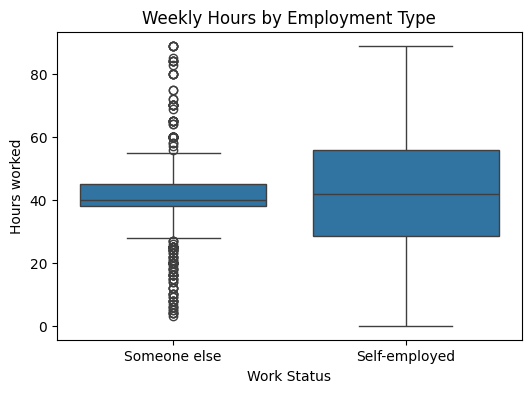

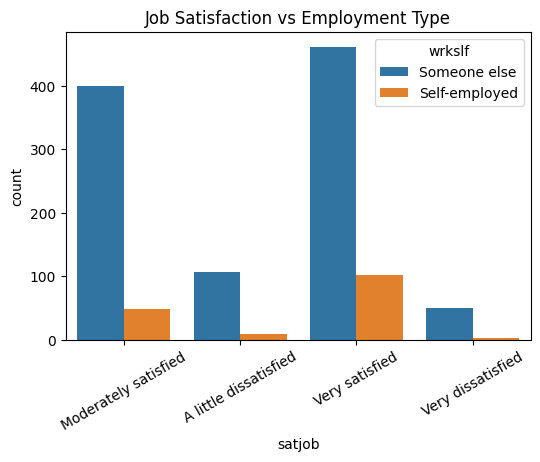

In [ ]:
# hours by employment type (finding self employment)
import matplotlib.pyplot as plt

# boxplot 
plt.figure(figsize=(6,4))
sns.boxplot(data=filtered_df_gss, x="wrkslf", y="hrs1")
plt.title("Weekly Hours by Employment Type")
plt.ylabel("Hours worked")
plt.xlabel("Work Status")
plt.show()

# bar plot satisfaction distr by employment
plt.figure(figsize=(6,4))
sns.countplot(data=filtered_df_gss, x="satjob", hue="wrkslf")
plt.title("Job Satisfaction vs Employment Type")
plt.xticks(rotation=30)
plt.show()

A preliminary analysis shows that the distribution of the box plots for those employed by others tends to center around 40 hours a week while the box plot of those who are self employed is quite spread, with hours reported as low as 20 hours or even upwards of 90 hours. The median is still a bit above 40 hours a week.
As for our bar plot, we do see that the numbers of overall responses tend to show that people are moderately to very satisfied with their job, but the number of people who are self employed and very satisfied are proportionally higher than those who are employed by others.

Let's take a look at the numbers for this!

In [27]:
# first i'll aggregate the counts for each employment type
# this shows the difference in avg weekly hours btwn employees and self-employed
filtered_df_gss.groupby("wrkslf")["hrs1"].agg(["count", "mean", "median", "std"])

,count,mean,median,std
wrkslf,,,,
Self-employed,150,42.473333,42.0,20.779668
Someone else,762,40.906824,40.0,13.395450


In [ ]:
# and then crosstab gives proportions of satisfaction within each employment type 
# this means x% of self-employed are very satisfied vs y% of employees
pd.crosstab(filtered_df_gss["satjob"], filtered_df_gss["wrkslf"], margins=True, normalize="columns")

wrkslf,Self-employed,Someone else,All
satjob,,,
A little dissatisfied,0.060976,0.105005,0.098901
Moderately satisfied,0.292683,0.392542,0.378698
Very dissatisfied,0.018293,0.049068,0.044801
Very satisfied,0.628049,0.453386,0.477599


#### 4.2 who would continue working if they were rich? and why?

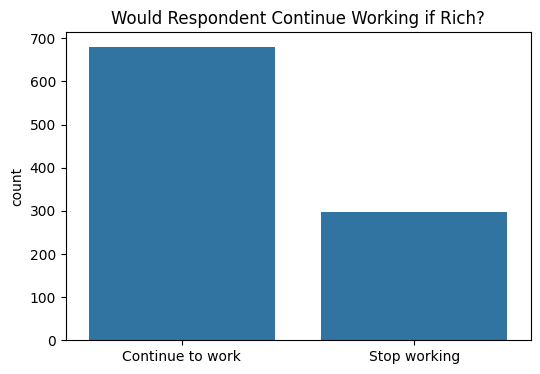

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=filtered_df_gss, x="richwork")
plt.title("Would Respondent Continue Working if Rich?")
plt.xlabel("")
plt.show()

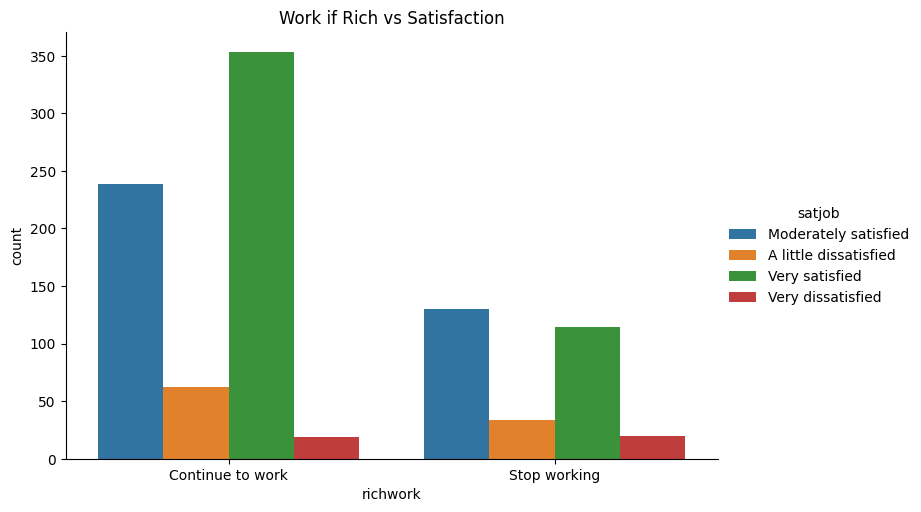

In [31]:
sns.catplot(data=filtered_df_gss, x="richwork", hue="satjob", kind="count", height=5, aspect=1.5)
plt.title("Work if Rich vs Satisfaction")
plt.show()

In [33]:
pd.crosstab(filtered_df_gss["richwork"], filtered_df_gss["satjob"], margins=True, normalize="columns")

satjob,A little dissatisfied,Moderately satisfied,Very dissatisfied,Very satisfied,All
richwork,,,,,
Continue to work,0.645833,0.647696,0.487179,0.755889,0.6931
Stop working,0.354167,0.352304,0.512821,0.244111,0.3069


From the first plot, it seems like there is a majority of people that said that they would continue to work even if they were still rich, which means that money is not the sole reason as to why they're working. The second plot gives us further insight that higher satisfaction in their work incentivizes people to continue working, even if they were rich, but those who are somewhat to very dissatisfied lean more towards stopping work if they had the financial freedom to do so.

#### 4.3 how does perception about job loss and job finding capabilities affect people's satisfaction with their jobs?

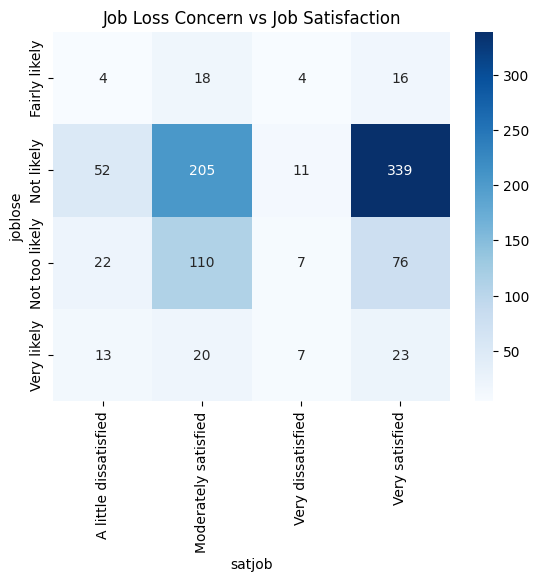

In [35]:
# crosstab heatmap, showing relationship between job loss concern and job satisfaction
crosstab = pd.crosstab(filtered_df_gss["joblose"], filtered_df_gss["satjob"])
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title("Job Loss Concern vs Job Satisfaction")
plt.show()

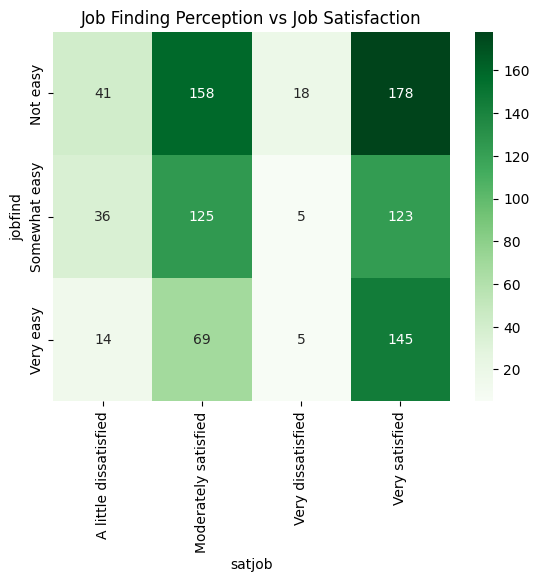

In [36]:
# now showing relationship between job finding perception and job satisfaction
crosstab2 = pd.crosstab(filtered_df_gss["jobfind"], filtered_df_gss["satjob"])
sns.heatmap(crosstab2, annot=True, fmt="d", cmap="Greens")
plt.title("Job Finding Perception vs Job Satisfaction")
plt.show()

The data seems a bit skewed since the raw data just has more people in general that are very satisfied with their jobs, so we will be normalizing with proportions to do further analysis.

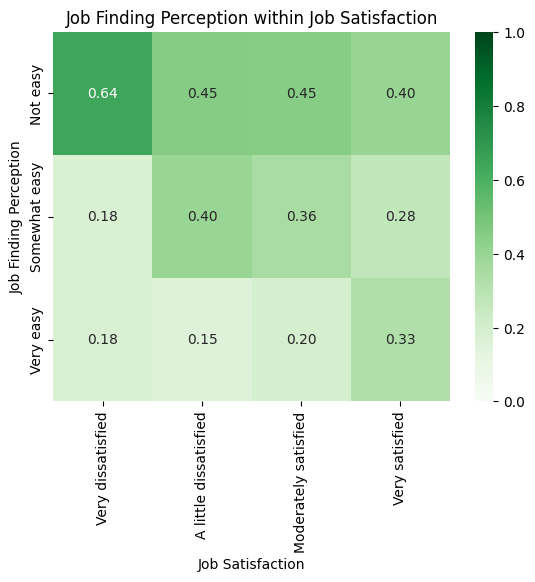

In [ ]:
# reordered category so the satisfactions and perceptions are more ordered
order_sat  = ["Very dissatisfied","A little dissatisfied","Moderately satisfied","Very satisfied"]
order_find = ["Not easy","Somewhat easy","Very easy"]

# reordering 
filtered_df_gss["satjob"]  = pd.Categorical(filtered_df_gss["satjob"],  categories=order_sat,  ordered=True)
filtered_df_gss["jobfind"] = pd.Categorical(filtered_df_gss["jobfind"], categories=order_find, ordered=True)

# counts and proportions -> this way we can see the proper proportions
ct_counts   = pd.crosstab(filtered_df_gss["jobfind"], filtered_df_gss["satjob"])    # raw counts
ct_colprop  = pd.crosstab(filtered_df_gss["jobfind"], filtered_df_gss["satjob"], normalize="columns")   # # proportions(jobfind | satjob) so columns sum to 1

# updated heatmap
sns.heatmap(ct_colprop, annot=True, fmt=".2f", cmap="Greens", vmin=0, vmax=1)
plt.title("Job Finding Perception within Job Satisfaction")
plt.ylabel("Job Finding Perception")
plt.xlabel("Job Satisfaction")
plt.show()

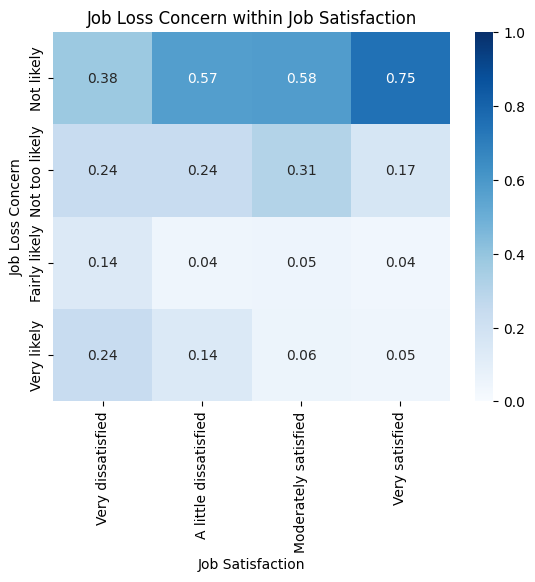

In [45]:
order_lose = ["Not likely", "Not too likely", "Fairly likely", "Very likely"]

# reordering 
filtered_df_gss["joblose"] = pd.Categorical(filtered_df_gss["joblose"], categories=order_lose, ordered=True)

# counts and proportions -> this way we can see the proper proportions
ct_counts   = pd.crosstab(filtered_df_gss["joblose"], filtered_df_gss["satjob"])    # raw counts
ct_colprop  = pd.crosstab(filtered_df_gss["joblose"], filtered_df_gss["satjob"], normalize="columns")# proportions(joblose | satjob) so columns sum to 1

# updated heatmap
sns.heatmap(ct_colprop, annot=True, fmt=".2f", cmap="Blues", vmin=0, vmax=1)
plt.title("Job Loss Concern within Job Satisfaction")
plt.ylabel("Job Loss Concern")
plt.xlabel("Job Satisfaction")
plt.show()

From these two plots, we see that respondents who are very satisfied with their jobs are more likely to believe finding a new job would be very easy, and that losing their current job is not likely. In contrast, those who are dissatisfied expect more difficulty in job finding and express more concerns about potential job loss.